In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


# Discovering personas associated with Type 2 diabetes risk using Kaggle data

In [106]:
import pandas as pd

data = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv') 

data.head(6)  


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
%matplotlib inline

In [4]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
diabetes_counts = data['Diabetes_binary'].value_counts()

print(diabetes_counts)


Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [6]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#  From above we can conclude that there are no null values in dataset

In [64]:
data.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Number of Unique values in each feature of Dataset**

In [66]:
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

# 1) Visualisation Of Data

**Ploting bivariate plot of each feature with respect to Target(Diabetes_binary)**

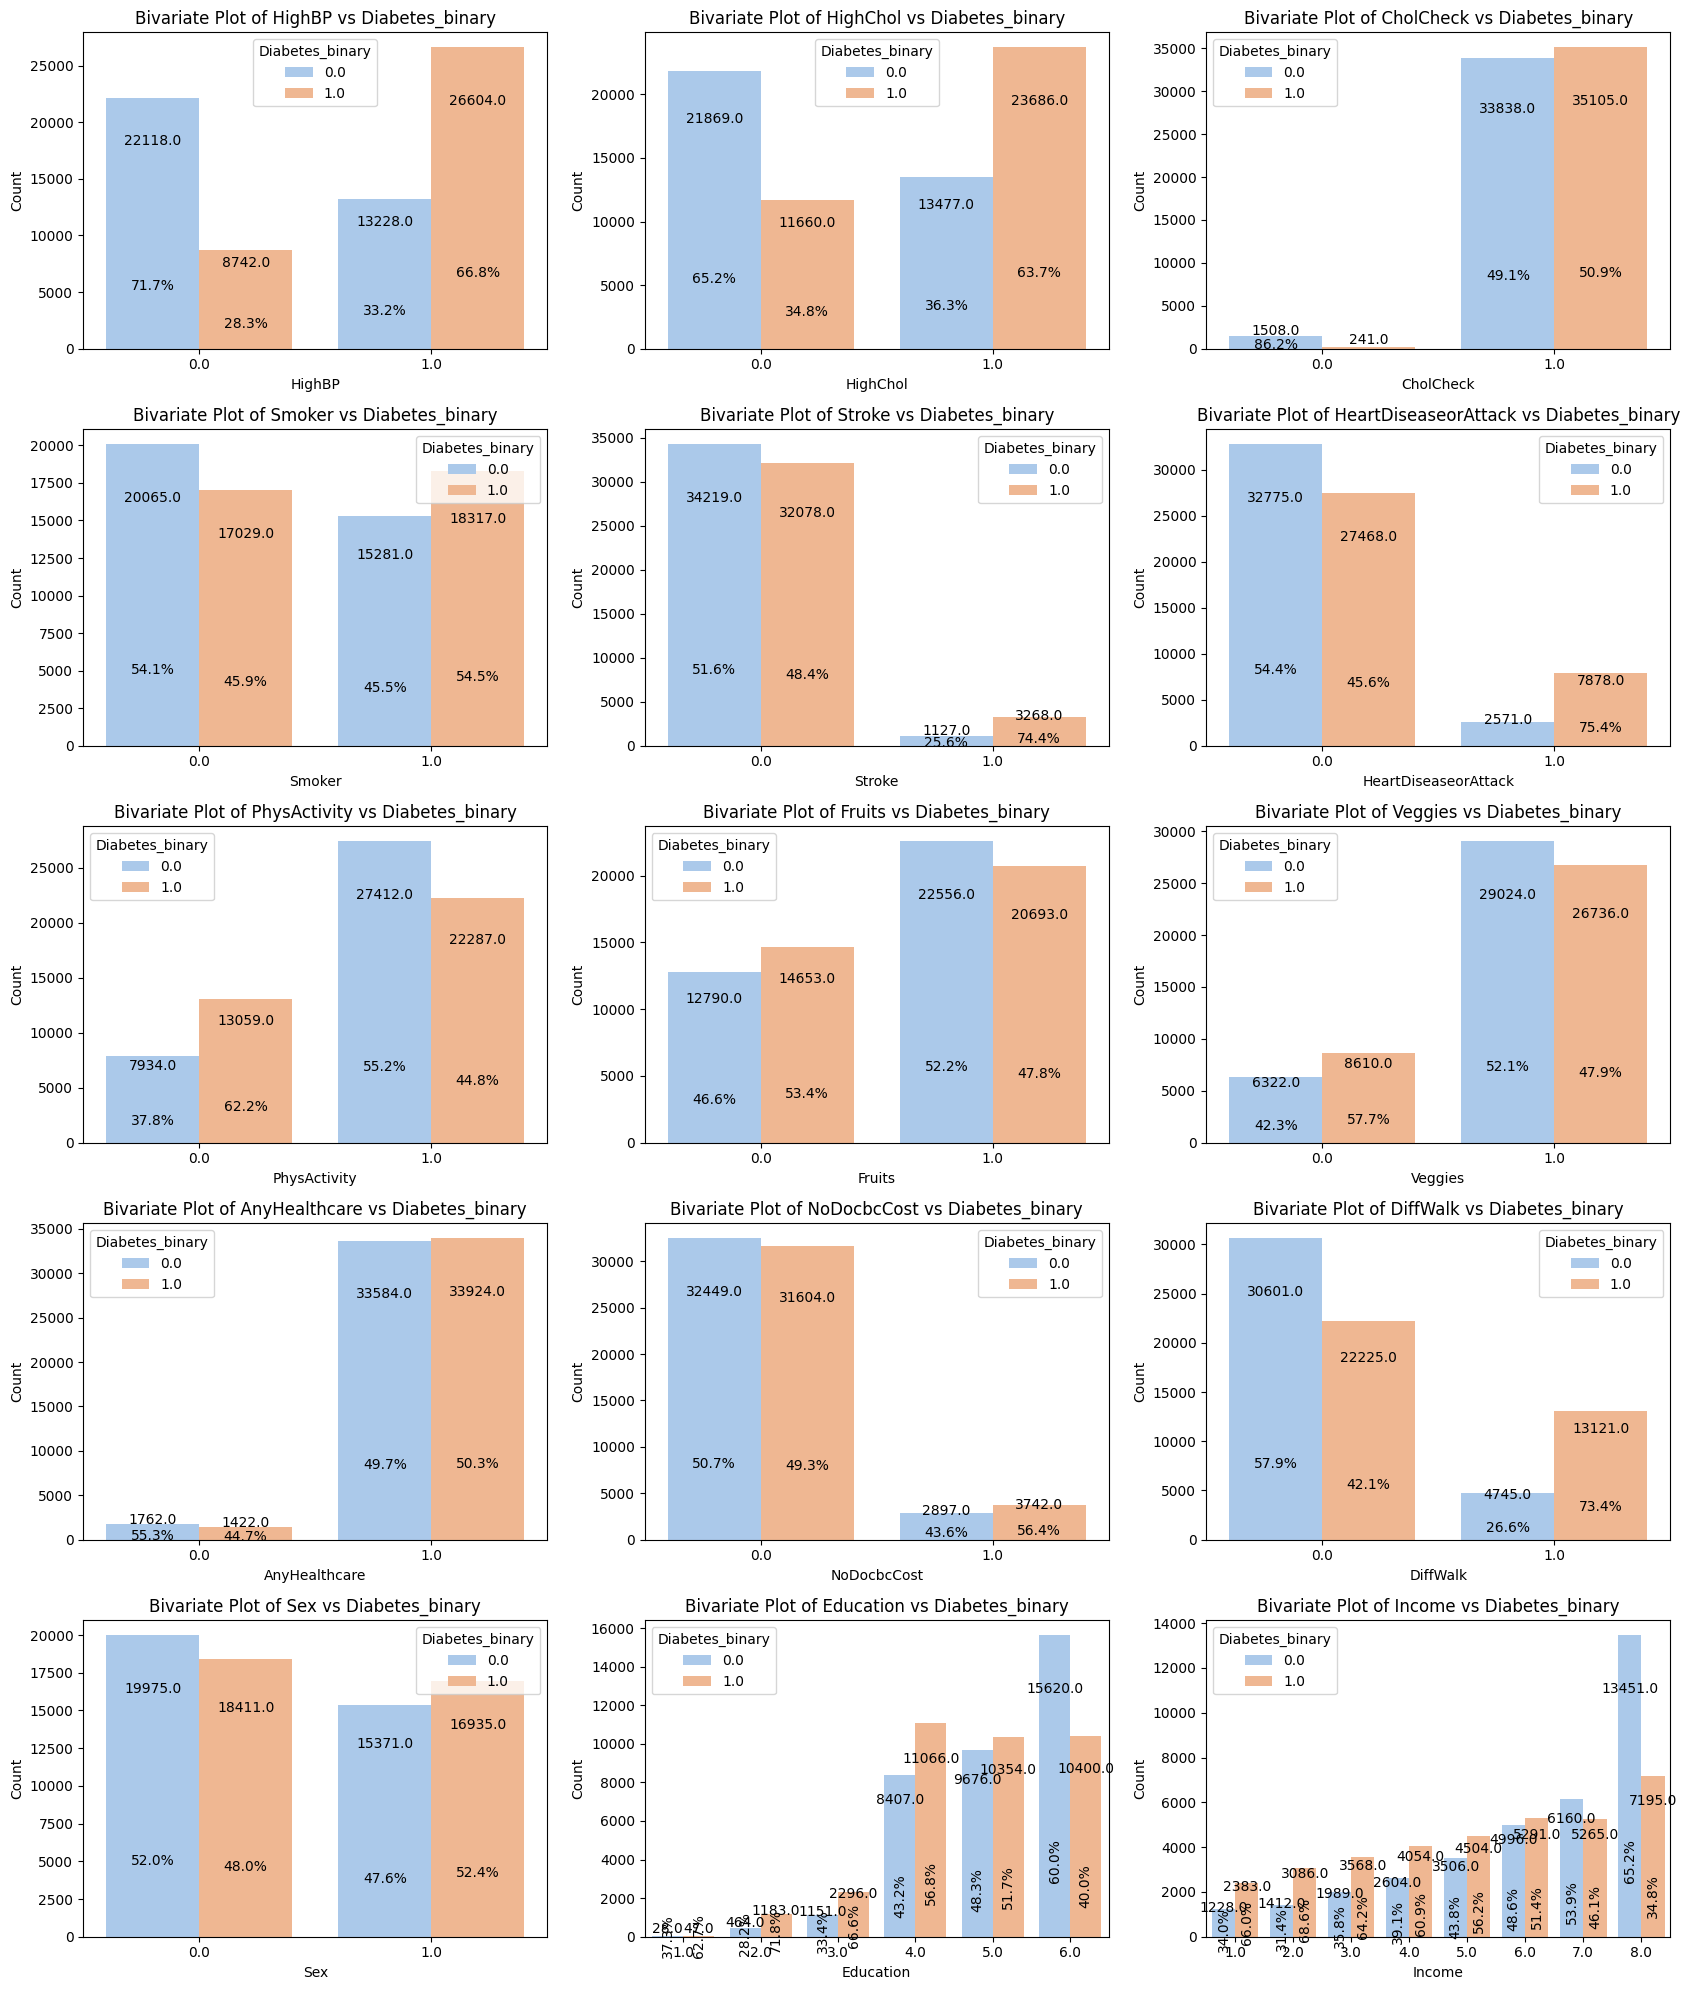

In [10]:
def plot_bivariate(cols, hue, fig_size=(17, 4)):
    num_cols = len(cols)
    num_rows = (num_cols + 2) // 3 
    fig, axes = plt.subplots(num_rows, 3, figsize=(fig_size[0], num_rows * fig_size[1]))

    for i, col in enumerate(cols):
        row_idx = i // 3
        col_idx = i % 3
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

        if data[col].nunique() > 5:
            rot = 90
        else:
            rot = 0
            
        def percentage(ax):
            heights = [[p.get_height() for p in bars] for bars in ax.containers]
            for bars in ax.containers:
                for i, p in enumerate(bars):
                    total = sum(group[i] for group in heights)
                    percentage = (100 * p.get_height() / total)
                    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() * 0.5, 0.8 * p.get_height()), 
                                ha='center', va='bottom', rotation=0)
                    if percentage > 25.0:
                        percentage = f'{percentage:.1f}%'
                        ax.annotate(percentage, (p.get_x() + p.get_width() * 0.5, 0.25 * p.get_height()), 
                                    ha='center', va='center', rotation=rot)

        plot = sns.countplot(x=data[col], hue=data[hue], palette='pastel', ax=ax)
        percentage(plot)
        ax.set_title(f'Bivariate Plot of {col} vs {hue}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

cols_to_plot = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                'PhysActivity', 'Fruits','Veggies', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex','Education','Income']
plot_bivariate(cols_to_plot, 'Diabetes_binary')


**Box Plot of features**

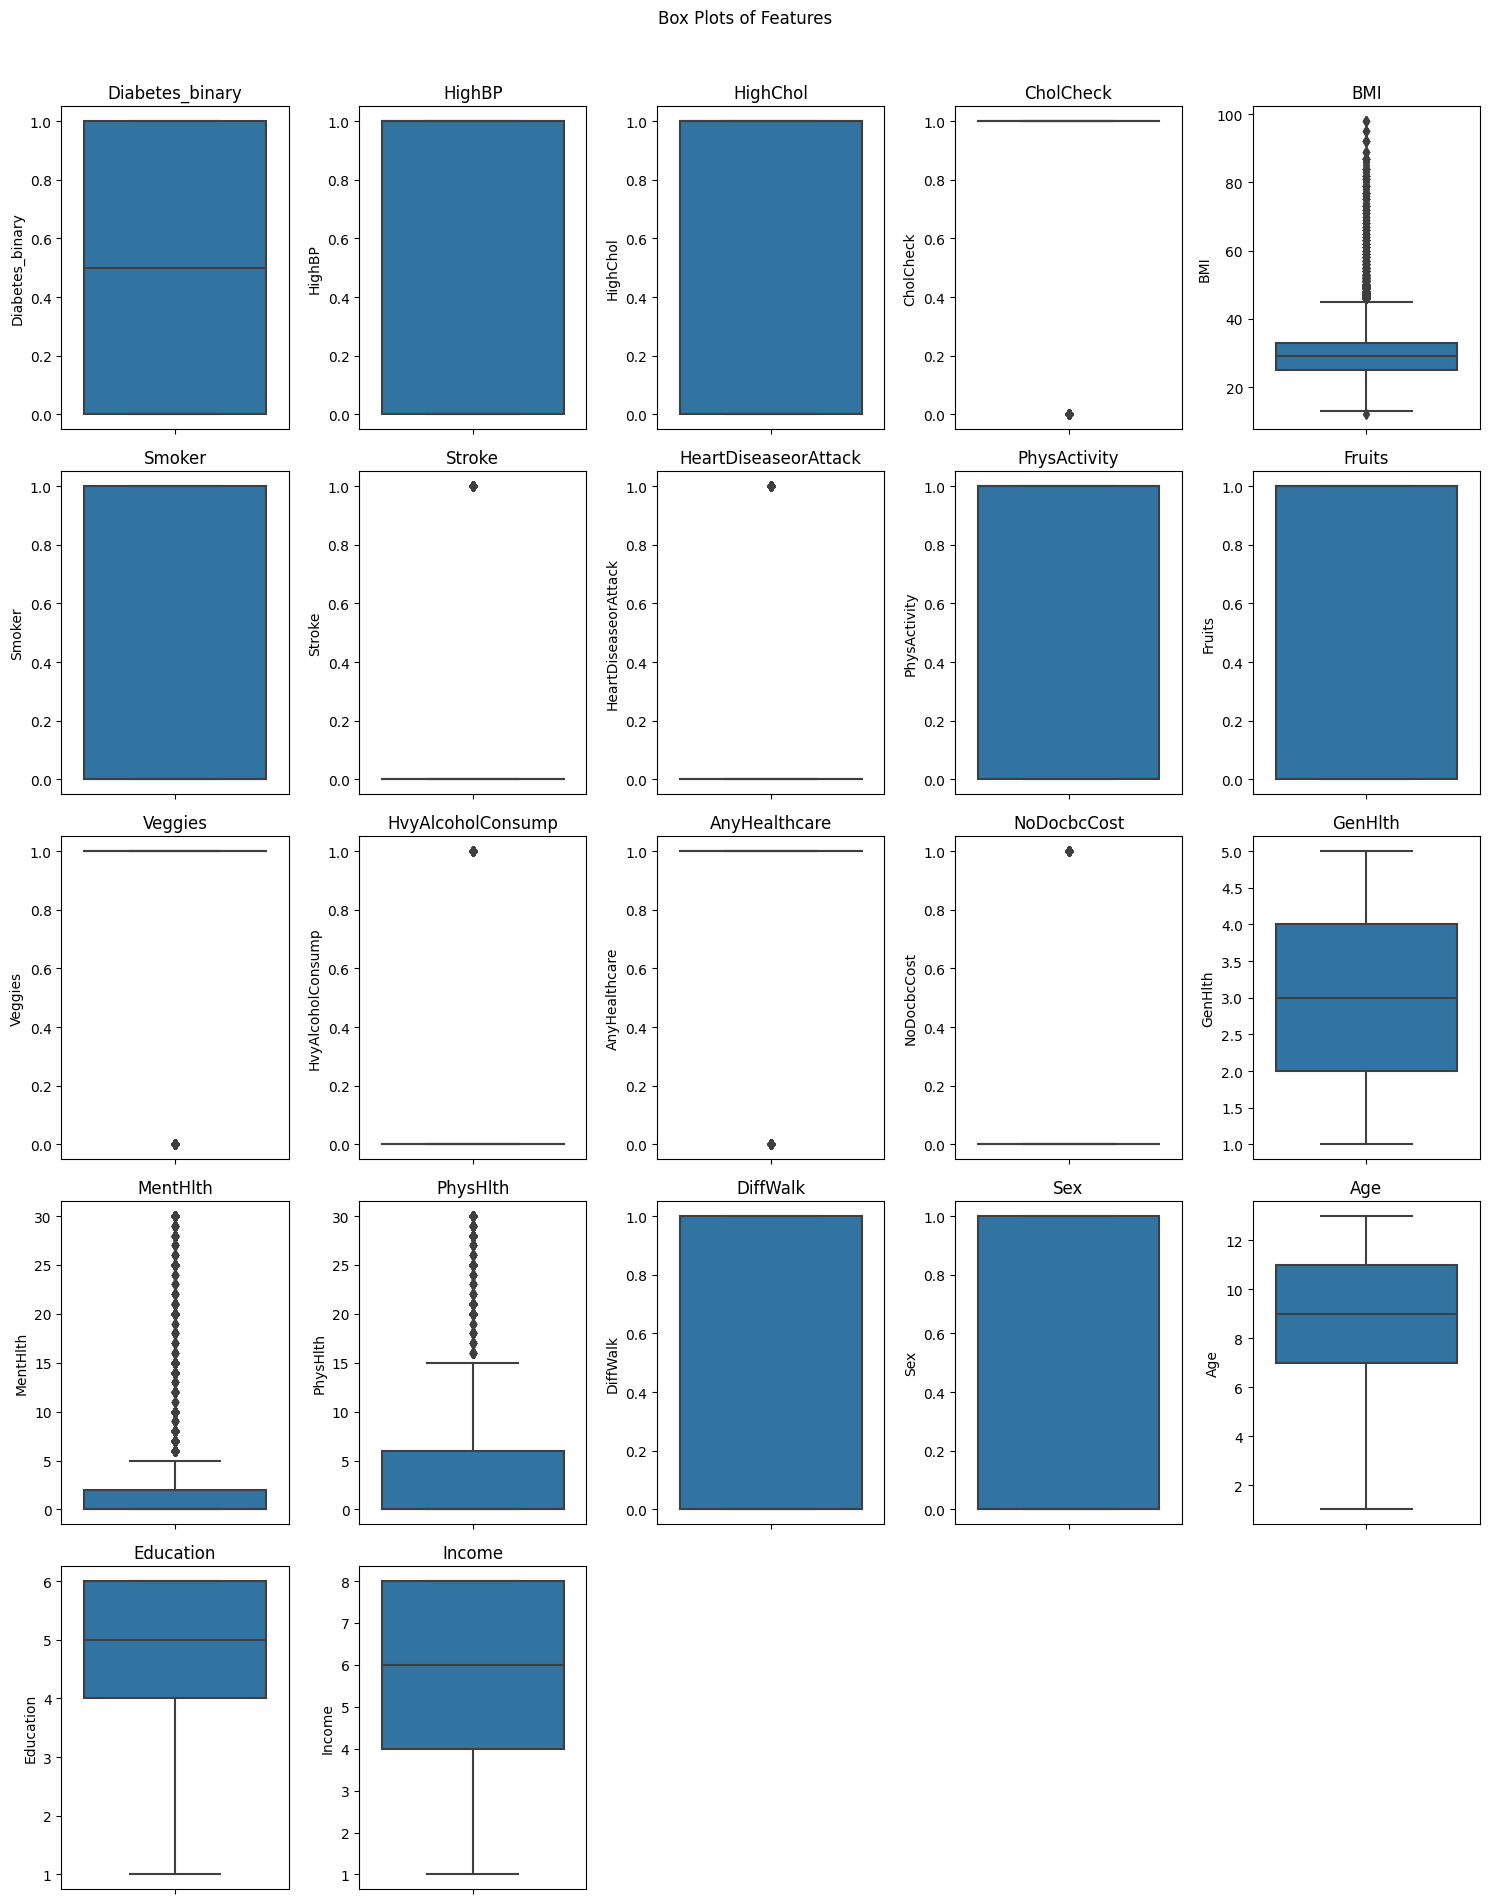

In [11]:
features = data.columns[:] 
plt.figure(figsize=(15, 20))  
for i, feature in enumerate(features):
    plt.subplot((len(features) // 5) + 1, 5, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Box Plots of Features')
plt.show()

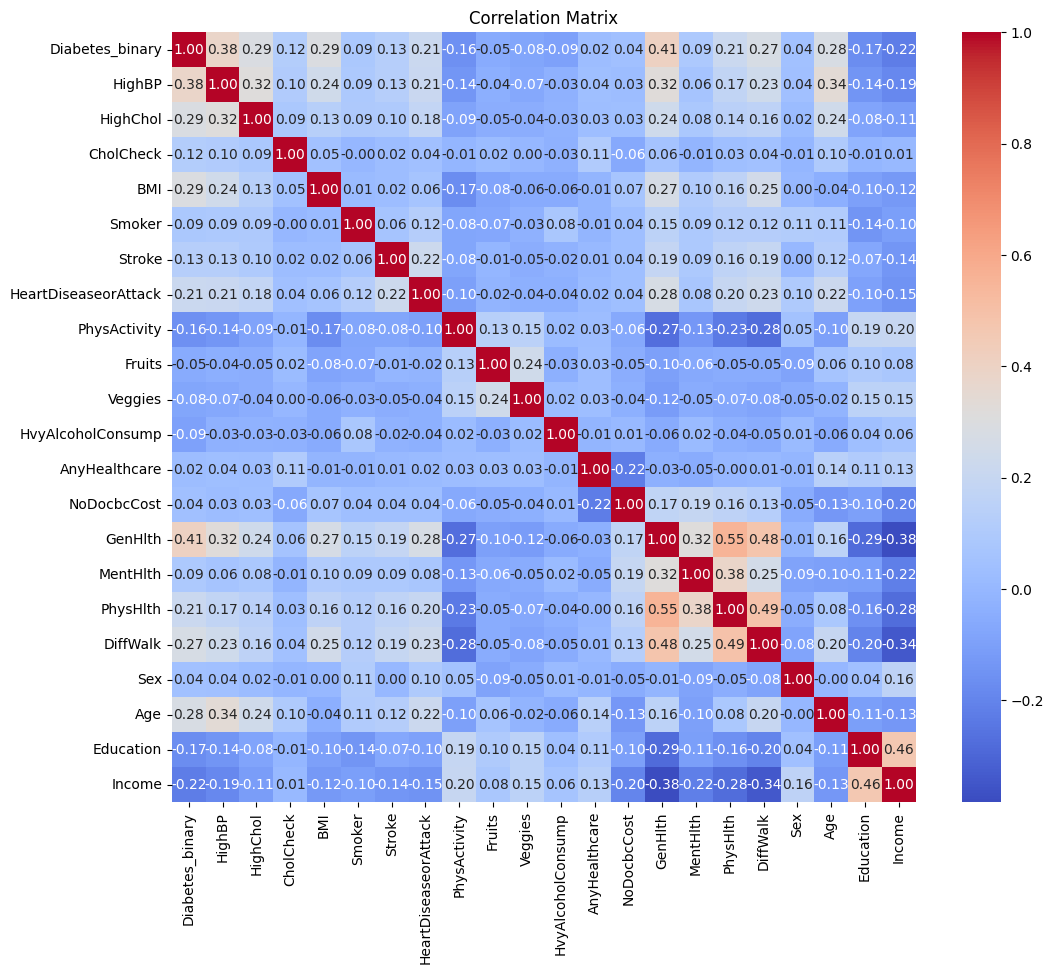

In [69]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

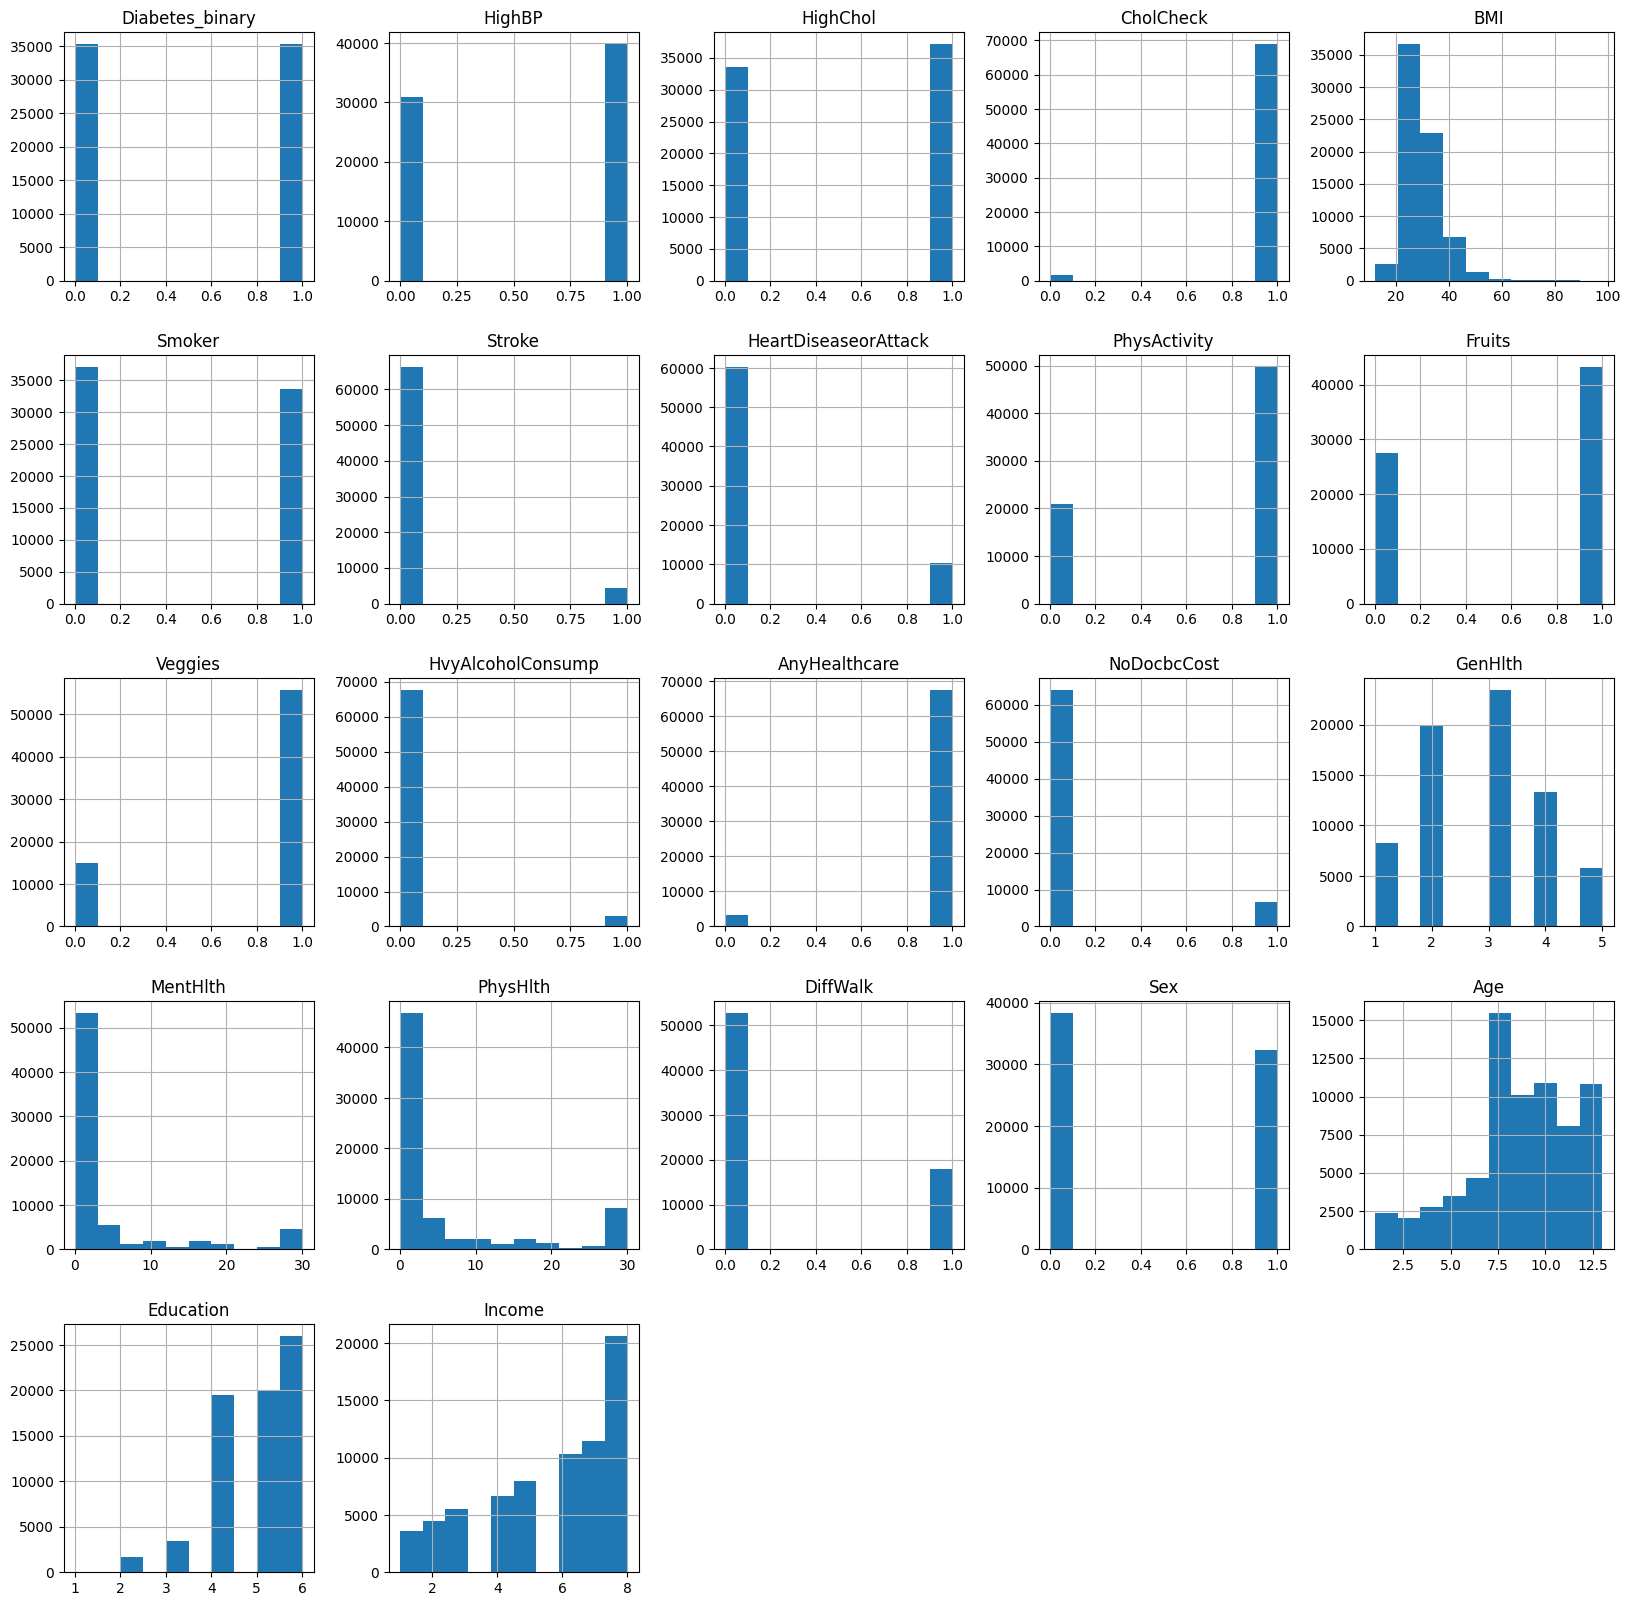

In [12]:
h = data.hist(figsize=(20,20))

# Feature selection
**Using chi 2 test to determine the significance of categorical features**

In [13]:
from sklearn.model_selection import train_test_split
features = data.columns.drop('Diabetes_binary')
target = 'Diabetes_binary'

X = data[features]
y = data[target]

X_trai, X_tes, y_trai, y_tes = train_test_split(X, y, test_size=0.2, random_state=100)

print(f"X_train shape: {X_trai.shape}")
print(f"X_test shape: {X_tes.shape}")
print(f"y_train shape: {y_trai.shape}")
print(f"y_test shape: {y_tes.shape}")

X_train shape: (56553, 21)
X_test shape: (14139, 21)
y_train shape: (56553,)
y_test shape: (14139,)


In [14]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_trai,y_trai)

In [139]:
f_p_values

(array([3.62638186e+03, 2.27405691e+03, 1.91257302e+01, 8.19820281e+03,
        2.44272873e+02, 8.59431941e+02, 2.17098655e+03, 4.29259600e+02,
        6.82640059e+01, 7.47352453e+01, 4.74438277e+02, 1.08867056e+00,
        9.39436945e+01, 4.14626548e+03, 7.98733620e+03, 4.47240963e+04,
        3.12226857e+03, 6.26204724e+01, 4.20804770e+03, 3.46899860e+02,
        2.43936958e+03]),
 array([0.00000000e+000, 0.00000000e+000, 1.22383821e-005, 0.00000000e+000,
        4.60322233e-055, 6.47225694e-189, 0.00000000e+000, 2.35524704e-095,
        1.43007686e-016, 5.38265510e-018, 3.46718299e-105, 2.96765958e-001,
        3.24628224e-022, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.50634583e-015, 0.00000000e+000, 2.00561423e-077,
        0.00000000e+000]))

In [15]:
c_values=pd.Series(f_p_values[0])
c_values.index=X_trai.columns
c_values

HighBP                   3626.381855
HighChol                 2274.056915
CholCheck                  19.125730
BMI                      8198.202813
Smoker                    244.272873
Stroke                    859.431941
HeartDiseaseorAttack     2170.986547
PhysActivity              429.259600
Fruits                     68.264006
Veggies                    74.735245
HvyAlcoholConsump         474.438277
AnyHealthcare               1.088671
NoDocbcCost                93.943694
GenHlth                  4146.265484
MentHlth                 7987.336201
PhysHlth                44724.096325
DiffWalk                 3122.268568
Sex                        62.620472
Age                      4208.047700
Education                 346.899860
Income                   2439.369577
dtype: float64

**Since all the columes are categorical columes therefore we havwe performed chisquare test for obtaining most relevant features accordingly**

In [141]:
c_values.sort_values(ascending=True)

AnyHealthcare               1.088671
CholCheck                  19.125730
Sex                        62.620472
Fruits                     68.264006
Veggies                    74.735245
NoDocbcCost                93.943694
Smoker                    244.272873
Education                 346.899860
PhysActivity              429.259600
HvyAlcoholConsump         474.438277
Stroke                    859.431941
HeartDiseaseorAttack     2170.986547
HighChol                 2274.056915
Income                   2439.369577
DiffWalk                 3122.268568
HighBP                   3626.381855
GenHlth                  4146.265484
Age                      4208.047700
MentHlth                 7987.336201
BMI                      8198.202813
PhysHlth                44724.096325
dtype: float64

In [16]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_trai.columns
p_values

HighBP                   0.000000e+00
HighChol                 0.000000e+00
CholCheck                1.223838e-05
BMI                      0.000000e+00
Smoker                   4.603222e-55
Stroke                  6.472257e-189
HeartDiseaseorAttack     0.000000e+00
PhysActivity             2.355247e-95
Fruits                   1.430077e-16
Veggies                  5.382655e-18
HvyAlcoholConsump       3.467183e-105
AnyHealthcare            2.967660e-01
NoDocbcCost              3.246282e-22
GenHlth                  0.000000e+00
MentHlth                 0.000000e+00
PhysHlth                 0.000000e+00
DiffWalk                 0.000000e+00
Sex                      2.506346e-15
Age                      0.000000e+00
Education                2.005614e-77
Income                   0.000000e+00
dtype: float64

In [143]:
p_values.sort_values(ascending=True)

HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
MentHlth                 0.000000e+00
GenHlth                  0.000000e+00
Income                   0.000000e+00
BMI                      0.000000e+00
HighChol                 0.000000e+00
HeartDiseaseorAttack     0.000000e+00
Stroke                  6.472257e-189
HvyAlcoholConsump       3.467183e-105
PhysActivity             2.355247e-95
Education                2.005614e-77
Smoker                   4.603222e-55
NoDocbcCost              3.246282e-22
Veggies                  5.382655e-18
Fruits                   1.430077e-16
Sex                      2.506346e-15
CholCheck                1.223838e-05
AnyHealthcare            2.967660e-01
dtype: float64

On the basis of above Chi square test **AnyHealthcare** is less significant

In [108]:
#Therefore droping AnyHealthcare column
data = data[data.columns.drop('AnyHealthcare')]

In [109]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

# Using Elbow Method to find optimum no. of clusters for K Means clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

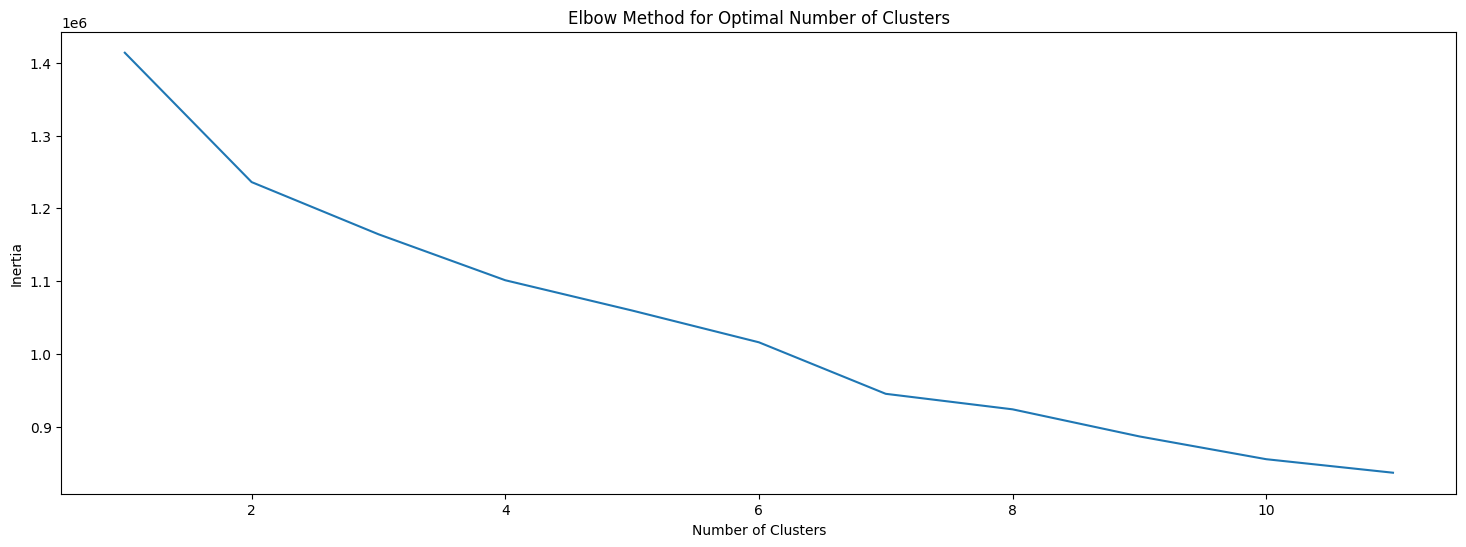

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data.columns.drop('Diabetes_binary')

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(18, 6))
plt.plot(range(1, 12), inertia, marker='', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [112]:
data_scaled.shape

(70692, 20)

**Applying K means clustering on Dataset and generating Cluster profiles**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Profiles:

Cluster 0:
  Diabetes_binary: 0.54
  HighBP: 0.59
  HighChol: 0.51
  CholCheck: 0.98
  BMI: 30.78
  Smoker: 0.52
  Stroke: 0.00
  HeartDiseaseorAttack: 0.00
  PhysActivity: 0.66
  Fruits: 0.59
  Veggies: 0.76
  HvyAlcoholConsump: 0.00
  NoDocbcCost: 0.00
  GenHlth: 3.00
  MentHlth: 2.00
  PhysHlth: 6.00
  DiffWalk: 0.28
  Sex: 0.38
  Age: 9.00
  Education: 4.00
  Income: 5.00

Cluster 1:
  Diabetes_binary: 0.64
  HighBP: 0.65
  HighChol: 0.64
  CholCheck: 0.97
  BMI: 32.16
  Smoker: 0.61
  Stroke: 0.06
  HeartDiseaseorAttack: 0.20
  PhysActivity: 0.53
  Fruits: 0.54
  Veggies: 0.72
  HvyAlcoholConsump: 0.00
  NoDocbcCost: 0.24
  GenHlth: 4.00
  MentHlth: 30.00
  PhysHlth: 18.00
  DiffWalk: 0.56
  Sex: 0.35
  Age: 8.00
  Education: 5.00
  Income: 4.00

Cluster 2:
  Diabetes_binary: 0.54
  HighBP: 0.58
  HighChol: 0.55
  CholCheck: 0.94
  BMI: 31.23
  Smoker: 0.49
  Stroke: 0.00
  HeartDiseaseorAttack: 0.14
  PhysActivity: 0.64
  Fruits: 0.56
  Veggies: 0.75
  HvyAlcoh

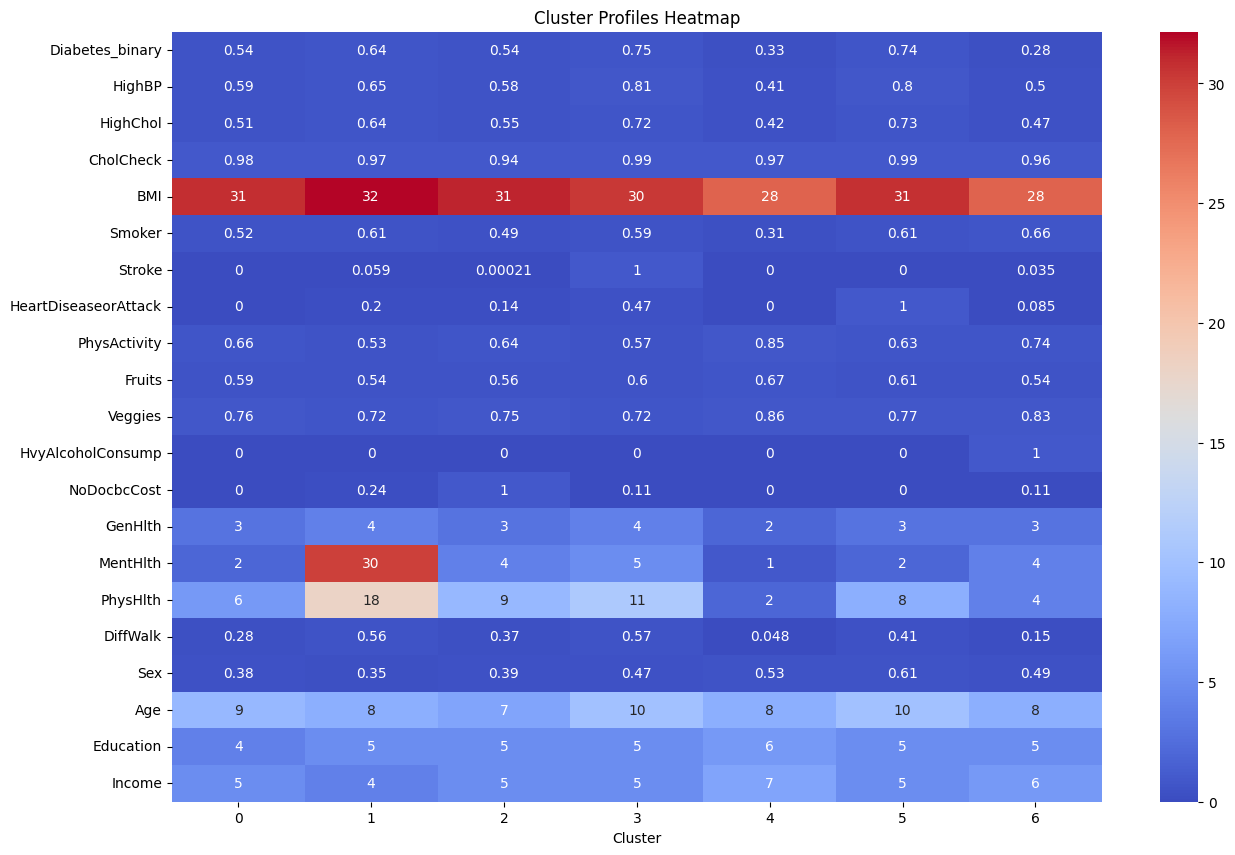

In [111]:
data_scaled[data_scaled < 0] = 0
data_scaled = data_scaled.astype(int)

k_optimal = 7
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
data['Cluster'] = kmeans.labels_

cluster_profiles = data.groupby('Cluster').mean()
features_to_round = ['Income', 'Age', 'Education', 'GenHlth','MentHlth','PhysHlth']
cluster_profiles[features_to_round] = cluster_profiles[features_to_round].round(0)

profiles = []
for cluster_id in cluster_profiles.index:
    profile = cluster_profiles.loc[cluster_id].to_dict()
    profile['Cluster'] = cluster_id
    profiles.append(profile)

print("Cluster Profiles:")
for profile in profiles:
    print(f"\nCluster {profile['Cluster']}:")
    for key, value in profile.items():
        if key != 'Cluster':
            print(f"  {key}: {value:.2f}")

plt.figure(figsize=(15, 10))
sns.heatmap(cluster_profiles.T, annot=True, cmap='coolwarm')
plt.title('Cluster Profiles Heatmap')
plt.show()


In [100]:
data.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Cluster
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,1
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,5
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,1
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,1
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0,3
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,2
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0,3
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0,1
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0,3


Evaluating the quality of clusters formed

In [22]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(data_scaled, labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.4241078976367743


In [24]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(data_scaled, labels)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 13937.60402779062


**High value of Calinski-Harabasz Index indicates better separation between clusters.**

Applying different modeles on different clusters to increase overall accuracy

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

y = data['Diabetes_binary']
data_scaled_df = pd.DataFrame(data_scaled)
data_scaled_df['Cluster'] = labels

data_sorted_by_cluster = data_scaled_df.sort_values(by='Cluster').reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(data_sorted_by_cluster, y, test_size=0.2, random_state=42)

even_clusters = X_train[X_train['Cluster'] % 2 == 0]

y_train_even = y_train[even_clusters.index]

X_train_even = even_clusters.drop(columns=['Cluster'])

nb_model_even = RandomForestClassifier(random_state=42)
rf_model_cluster_1 = GaussianNB()
rf_model_cluster_3 = XGBClassifier(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=2,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=42
)
rf_model_cluster_5 = RandomForestClassifier(random_state=42)

nb_model_even.fit(X_train_even, y_train_even)
rf_model_cluster_1.fit(X_train[X_train['Cluster'] == 1].drop(columns=['Cluster']), y_train[X_train['Cluster'] == 1])
rf_model_cluster_3.fit(X_train[X_train['Cluster'] == 3].drop(columns=['Cluster']), y_train[X_train['Cluster'] == 3])
rf_model_cluster_5.fit(X_train[X_train['Cluster'] == 5].drop(columns=['Cluster']), y_train[X_train['Cluster'] == 5])

X_test_even = X_test[X_test['Cluster'] % 2 == 0].drop(columns=['Cluster'])
y_test_even = y_test[X_test_even.index]

y_pred_even = nb_model_even.predict(X_test_even)

X_test_cluster_1 = X_test[X_test['Cluster'] == 1].drop(columns=['Cluster'])
X_test_cluster_3 = X_test[X_test['Cluster'] == 3].drop(columns=['Cluster'])
X_test_cluster_5 = X_test[X_test['Cluster'] == 5].drop(columns=['Cluster'])

y_pred_cluster_1 = rf_model_cluster_1.predict(X_test_cluster_1)
y_pred_cluster_3 = rf_model_cluster_3.predict(X_test_cluster_3)
y_pred_cluster_5 = rf_model_cluster_5.predict(X_test_cluster_5)

y_test_combined = pd.concat([y_test_even, y_test[X_test_cluster_1.index], y_test[X_test_cluster_3.index], y_test[X_test_cluster_5.index]])
y_pred_combined = pd.concat([pd.Series(y_pred_even.tolist(), index=y_test_even.index),
                             pd.Series(y_pred_cluster_1.tolist(), index=X_test_cluster_1.index),
                             pd.Series(y_pred_cluster_3.tolist(), index=X_test_cluster_3.index),
                             pd.Series(y_pred_cluster_5.tolist(), index=X_test_cluster_5.index)])

overall_accuracy = accuracy_score(y_test_combined, y_pred_combined)

even_cluster_accuracy = accuracy_score(y_test_even, y_pred_even)
cluster_1_accuracy = accuracy_score(y_test[X_test_cluster_1.index], y_pred_cluster_1)
cluster_3_accuracy = accuracy_score(y_test[X_test_cluster_3.index], y_pred_cluster_3)
cluster_5_accuracy = accuracy_score(y_test[X_test_cluster_5.index], y_pred_cluster_5)

print(f"Overall accuracy: {overall_accuracy}")
print(f"Even cluster accuracy: {even_cluster_accuracy}")
print(f"Cluster 1 accuracy: {cluster_1_accuracy}")
print(f"Cluster 3 accuracy: {cluster_3_accuracy}")
print(f"Cluster 5 accuracy: {cluster_5_accuracy}")


Overall accuracy: 0.9964636820142867
Even cluster accuracy: 0.9993729845933357
Cluster 1 accuracy: 1.0
Cluster 3 accuracy: 0.9457755359394704
Cluster 5 accuracy: 1.0


**Cluster Profile Generation**

In [114]:
import pandas as pd

def analyze_clusters_and_create_personas(cluster_profiles):
    insights = []
   
    for cluster_id, profile in cluster_profiles.iterrows():
        insight = f"Cluster {cluster_id}\n"
        
        if profile['Diabetes_binary'] < 0.3:
            insight += "  Diabetic patients distribution: Mostly non-diabetic\n"
        elif profile['Diabetes_binary'] < 0.5:
            insight += "  Diabetic patients distribution: Equally distributed\n"
        else:
            insight += "  Diabetic patients distribution: Most people are diabetic\n"
        
        insight += "\nDemographics:\n"
        insight += f"- Most people belong to Age class: {profile['Age']:.1f} \n"
        insight += f"  Gender Distribution: {'Mostly Female' if profile['Sex'] < 0.5 else 'Mostly Male'}\n"
        insight += f"  Education Level: {profile['Education']}\n"
        insight += f"  Income Level: {profile['Income']}\n"
        
        insight += "\nHealth Behaviors:\n"
        insight += f"- BMI: {profile['BMI']:.1f}\n"
        insight += f"- Smoker: {'Yes' if profile['Smoker'] > 0.5 else 'No'}\n"
        insight += f"- Physically Active: {'Yes' if profile['PhysActivity'] > 0.5 else 'No'}\n"
        insight += f"  Heavy Alcohol Consumption: {'Yes' if profile['HvyAlcoholConsump'] > 0.5 else 'No'}\n"
        
        insight += "\nOverall Health Status:\n"
        insight += f"- High Blood Pressure: {'Yes' if profile['HighBP'] > 0.5 else 'No'}\n"
        insight += f"- High Cholesterol: {'Yes' if profile['HighChol'] > 0.5 else 'No'}\n"
        insight += f"- General Health: {profile['GenHlth']} (1=Excellent, 5=Poor)\n"
        insight += f"- Days of Poor Mental Health: {profile['MentHlth']}\n"
        insight += f"- Days of Poor Physical Health: {profile['PhysHlth']}\n"
        insight += f"- Difficulty Walking: {'Yes' if profile['DiffWalk'] > 0.5 else 'No'}\n"
        
        insight += "\nActionable Insights:\n"

        if profile['PhysActivity'] < 0.5:
            insight += "Enrole in physical activity programs.\n"
        if profile['BMI'] > 30:
            insight += "Need weight management and nutrition counseling \n"
        if profile['Smoker'] > 0.5:
            insight += "Avoid smoking by nicotine replacement therapy\n"
        if profile['HighBP'] > 0.5:
            insight += "Keep a track on blood preasure and regulate your blood preasure\n"
        if profile['HighChol'] > 0.5:
            insight += "Take low cholesterol food\n"
        if profile['GenHlth'] > 3:
            insight += "Take regular health checkups\n"
       
        insights.append(insight)
        
    return insights

insights = analyze_clusters_and_create_personas(cluster_profiles)

def get_cluster_insights(cluster_id, insights):
    if 0 <= cluster_id < len(insights):
        return insights[cluster_id]
    else:
        return "No insights available for this cluster."

# Print insights
for insight in insights:
    print(insight)
    print("~." * 40)


Cluster 0
  Diabetic patients distribution: Most people are diabetic

Demographics:
- Most people belong to Age class: 9.0 
  Gender Distribution: Mostly Female
  Education Level: 4.0
  Income Level: 5.0

Health Behaviors:
- BMI: 30.8
- Smoker: Yes
- Physically Active: Yes
  Heavy Alcohol Consumption: No

Overall Health Status:
- High Blood Pressure: Yes
- High Cholesterol: Yes
- General Health: 3.0 (1=Excellent, 5=Poor)
- Days of Poor Mental Health: 2.0
- Days of Poor Physical Health: 6.0
- Difficulty Walking: No

Actionable Insights:
Need weight management and nutrition counseling 
Avoid smoking by nicotine replacement therapy
Keep a track on blood preasure and regulate your blood preasure
Take low cholesterol food

~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
Cluster 1
  Diabetic patients distribution: Most people are diabetic

Demographics:
- Most people belong to Age class: 8.0 
  Gender Distribution: Mostly Female
  Education Level: 5.0
  Incom

**Testing model on different inputs**

In [88]:
# inputs
#input_data = [1,1,1,33,0,0,0,0,1,1,0,0,4,0,0,0,0,11,5,3]
#input_data = [0, 0, 1, 26, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 5, 2]
#input_data = [0, 0, 1, 18, 0, 0, 0, 1, 1, 1, 0, 0, 2, 7, 0, 0, 0, 1, 4, 7]
#input_data = [1, 0, 1, 58, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 0, 1, 10, 4, 6]

input_data = [1, 1, 1, 30, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 12, 4, 5]

#to predict to which cluster the given datapoint belongs to
predicted_cluster = kmeans.predict([input_data])[0]

print(f"The data point belongs to Cluster {predicted_cluster}.")
selected_model = None

if predicted_cluster % 2 == 0:
    selected_model = nb_model_even  
elif predicted_cluster == 1:
    selected_model = rf_model_cluster_1  
elif predicted_cluster == 3:
    selected_model = rf_model_cluster_3 
elif predicted_cluster == 5:
    selected_model = rf_model_cluster_5 

predicted_diabetes = selected_model.predict([input_data])[0]

print(f"The Person is: {'Diabetic' if predicted_diabetes == 1 else 'Non-Diabetic'}")
insights_for_predicted_cluster = get_cluster_insights(predicted_cluster,insights)

if(predicted_diabetes ==1):
    
    print(insights_for_predicted_cluster)

The data point belongs to Cluster 0.
The Person is: Diabetic
Cluster 0
  Diabetic patients distribution: Most people are diabetic

Demographics:
- Most people belong to Age class: 9.0 years
  Gender Distribution: Mostly Female
  Education Level: 4.0
  Income Level: 5.0

Health Behaviors:
- BMI: 30.8
- Smoker: Yes
- Physically Active: Yes
  Heavy Alcohol Consumption: No

Overall Health Status:
- High Blood Pressure: Yes
- High Cholesterol: Yes
- General Health: 3.0 (1=Excellent, 5=Poor)
- Days of Poor Mental Health: 2.0
- Days of Poor Physical Health: 6.0
- Difficulty Walking: No

Actionable Insights:
Need weight management and nutrition counseling 
Avoid smoking by nicotine replacement therapy
Keep a track on blood preasure and regulate your blood preasure
Take low cholesterol food

